In [1]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

Solving TSP using genetic algorithm
Generations: 125
Population size: 2000
Initial population created
0
10
20
30
40
50
60
70
80
90
100
110
120
Best chromosome: [0, 1, 6, 4, 13, 15, 3, 8, 7, 17, 9, 14, 11, 12, 5, 10, 2, 16]


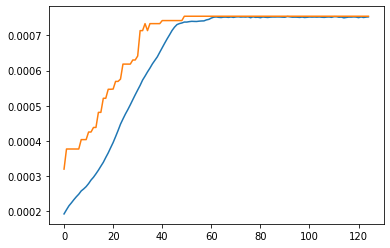

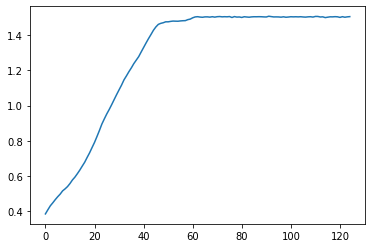

In [2]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 2000
generations = 125
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size)

# Run optimzation and write to file
solution = ga.solve_tsp(tsp_data)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

### Part 2: Path Finding Through Ant Colony Optimization

In [3]:
# Please keep your parameters for the ACO easily changeable here
gen = 3
no_gen = 4
q = 1300
evap = 0.2
convergence = 4

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")
spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, q, evap, convergence)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

Ready reading maze file ./../data/hard_maze.txt
Time taken: 17.126
Route size: 967


### Synthesis

In [ ]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 3
no_gen = 4
q = 1300
evap = 0.2
convergence = 4

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap, convergence)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")

Ready reading maze file ./../data/hard_maze.txt
